In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.datasets import make_blobs
import random
import json
import time
from tabulate import tabulate

from kdtree import *
from helper import *

In [2]:
savefile = "mst_data2.json"
to_plot = True
no_points = 100
no_centres = 10

In [3]:
X, Y = make_blobs(n_samples=no_points, centers=no_centres, random_state=42)
points = [(x, y) for x, y in X]
# points = [(-9.440034368865406, 9.175801100007641), (-9.438966446554815, 7.031829165705426), (-9.379446519079195, 7.43852691936011), (-8.030620768573574, -6.504411574930275), (-7.424009915676453, -6.76918700356608), (-5.625034075862577, -6.1605415217413535), (-4.030803423197486, 0.19402493705546847), (-3.5220287433871738, 9.328533460793595), (-3.417221698573961, 7.60198242686303), (-2.8396216175251126, -4.89526140443387), (2.0088030101262415, 3.1037406269650085), (2.844845146967365, 2.9406079059498866), (4.707407040916025, 0.5484214977272752), (5.320666767110005, -5.556356550565353), (6.105527605149655, 1.7473933834541964)]

In [23]:
cordmap = {point: i for i, point in enumerate(points)}

In [24]:
def dcran(cordmap):
    tree = KDTree()
    tree.root = tree.build(points)
    
    G = nx.Graph()
    for coord, index in cordmap.items():
        G.add_node(index, pos=coord)
    k = 2
    ccount = len(cordmap)
    disset = set()
    visited = set()
    while ccount != 1:
        dis2 = min(len(cordmap) , math.factorial(k) )
        disset.update([k , dis2])
        disset = disset - visited
        visited.update([k , dis2])
        for kdis in sorted(list(disset)):
            for pointi, i in cordmap.items():
                pointj = ith_nearest_neighbor(tree, pointi, kdis)
                dis = euclidean_distance(pointi, pointj)
                G.add_edge(i, cordmap[pointj], weight=dis)
            graphify(G, to_plot , f'connect all points with {kdis}th nearest neighbor and k = {k}')
            ccount = count_clusters(G)
            print(kdis, ccount)
        k += 1
        
        if ccount == 1:
            break
        
    return G , tree

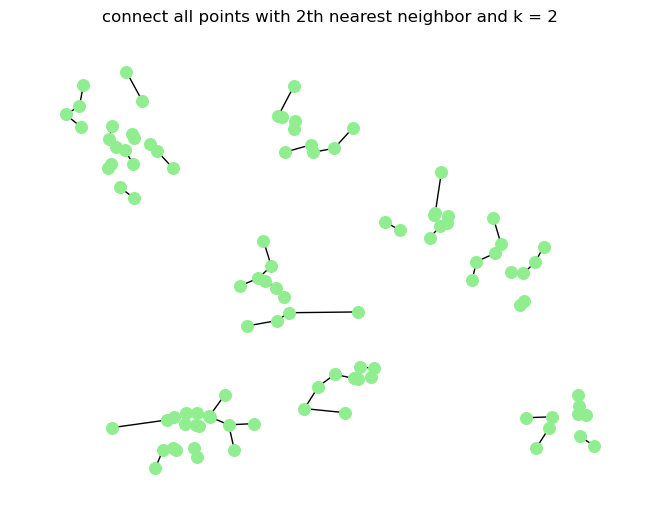

2 29


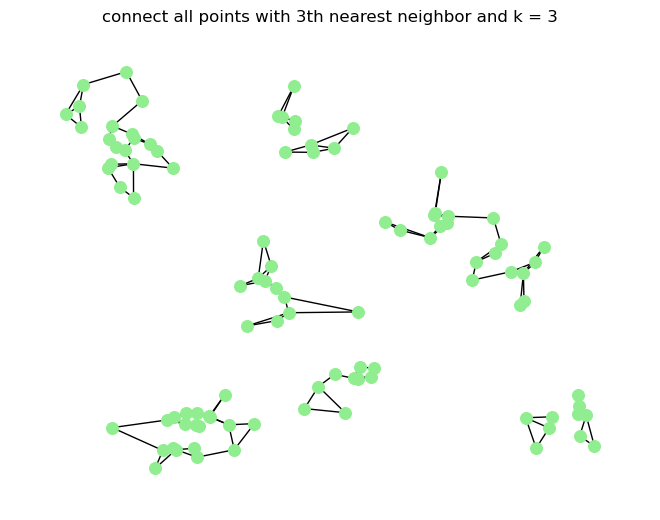

3 9


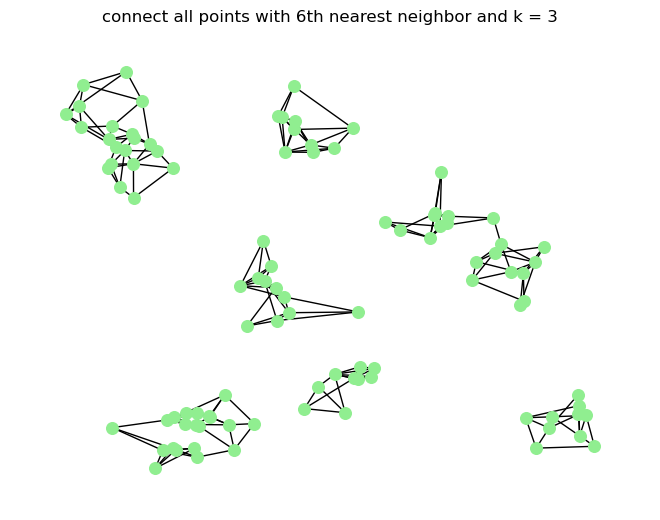

6 7


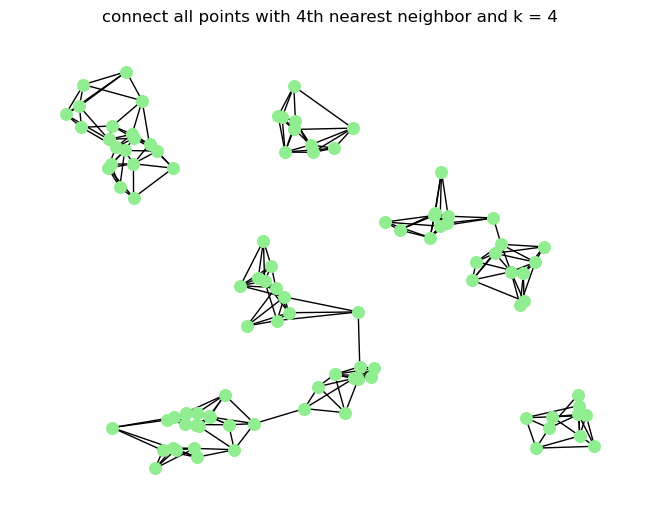

4 5


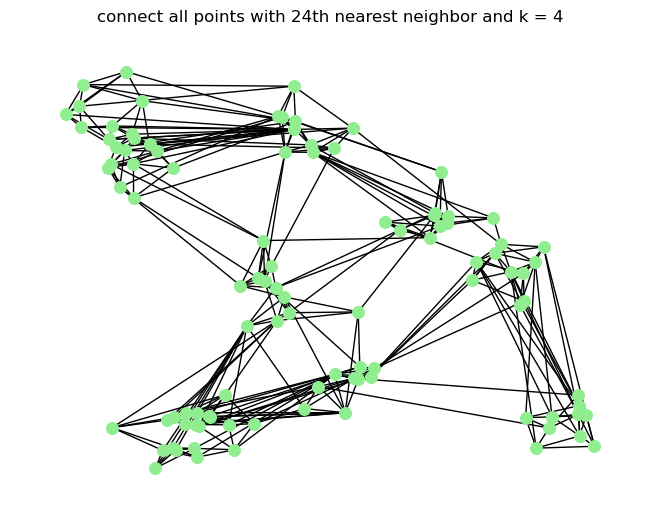

24 1


In [25]:
dcran_start_time = time.time()
kc , tree = dcran(cordmap)

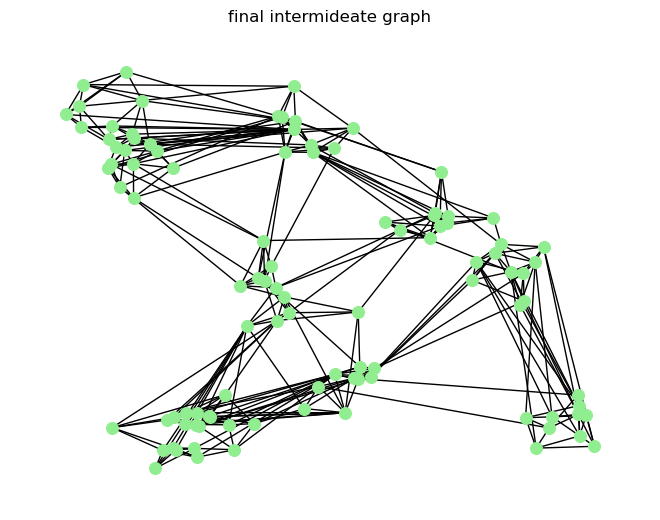

In [26]:
graphify(kc, to_plot , "final intermideate graph")

In [27]:
G = kc
num_nodes = G.number_of_nodes()
conedge = num_edges = G.number_of_edges()

# Calculate the sum of all edge weights
total_weight = sum(data["weight"] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")

Total number of nodes: 100
Total number of edges: 367
Total sum of edge weights: 935.4178771474973


In [28]:

def plot_kd_tree(node, min_x, max_x, min_y, max_y, prev_node, branch, depth=0):
    """Plot the kd-tree using matplotlib."""
    if node is None:
        return
    
    cur_point = node.point
    axis = node.axis

    if axis == 0:
        if branch is not None and prev_node is not None:
            if branch:
                max_y = prev_node.point[1]
            else:
                min_y = prev_node.point[1]
                
        plt.plot([cur_point[0], cur_point[0]], [min_y, max_y], 'r')
        plot_kd_tree(node.left, min_x, cur_point[0], min_y, max_y, node, True, depth + 1)
        plot_kd_tree(node.right, cur_point[0], max_x, min_y, max_y, node, False, depth + 1)

    elif axis == 1:
        if branch is not None and prev_node is not None:
            if branch:
                max_x = prev_node.point[0]
            else:
                min_x = prev_node.point[0]
                
        plt.plot([min_x, max_x], [cur_point[1], cur_point[1]], 'b')
        plot_kd_tree(node.left, min_x, max_x, min_y, cur_point[1], node, True, depth + 1)
        plot_kd_tree(node.right, min_x, max_x, cur_point[1], max_y, node, False, depth + 1)

    plt.plot(cur_point[0], cur_point[1], 'ko')

# Plotting


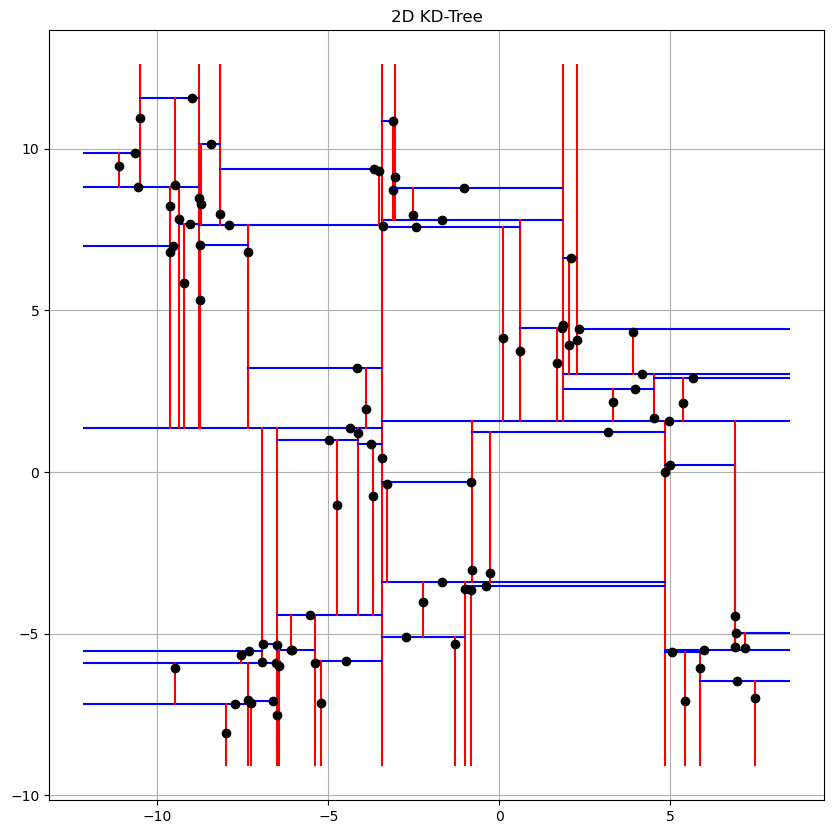

In [29]:
if to_plot:
    plt.figure(figsize=(10, 10))
    plt.title("2D KD-Tree")
    plot_kd_tree(tree.root, min_x=min([p[0] for p in points]) - 1, max_x=max([p[0] for p in points]) + 1,
                min_y=min([p[1] for p in points]) - 1, max_y=max([p[1] for p in points]) + 1, prev_node=None, branch=None)
    plt.grid(True)
    plt.show()

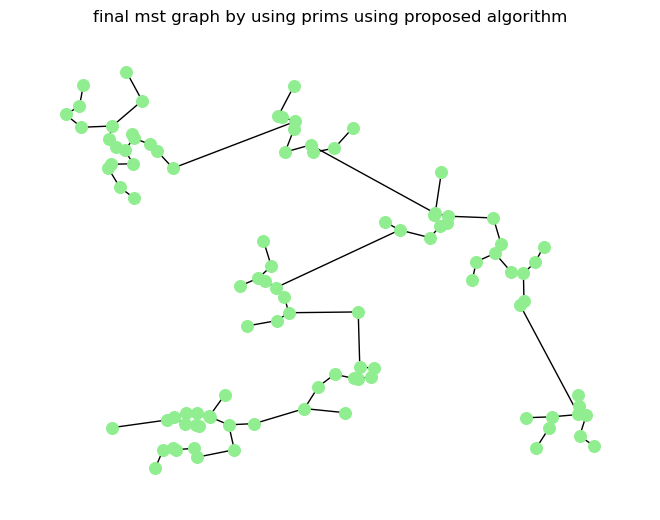

In [30]:
mst = nx.minimum_spanning_tree(G, algorithm="prim", weight="weight")
graphify(mst, to_plot , "final mst graph by using prims using proposed algorithm")



In [31]:
G = mst
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()


foundw = total_weight = sum(data["weight"] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")
dcran_end_time = time.time()
dcran_elapsed_time = dcran_end_time - dcran_start_time

Total number of nodes: 100
Total number of edges: 99
Total sum of edge weights: 97.43014102905906


In [32]:
stmst_start_time = time.time()
G = nx.Graph()

for pointi, i in cordmap.items():
    G.add_node(i, pos=pointi)
    for pointj, j in cordmap.items():
        if i != j:
            dis = euclidean_distance(pointi, pointj)
            G.add_edge(i, j, weight=dis)

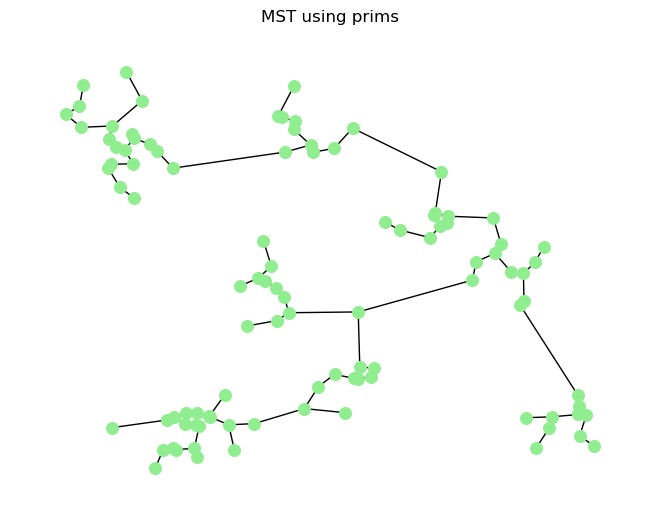

In [33]:
mst = nx.minimum_spanning_tree(G, algorithm="prim", weight="weight")
graphify(mst, to_plot ,"MST using prims" )

In [34]:
G = mst
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Calculate the sum of all edge weights
realw = total_weight = sum(data["weight"] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")
stmst_end_time = time.time()
stmst_elapsed_time = stmst_end_time - stmst_start_time

Total number of nodes: 100
Total number of edges: 99
Total sum of edge weights: 92.57131083762039


In [35]:
percentage_error = ((foundw - realw) / realw) * 100

# Format the output for readability
formatted_output = f"Real Weight: {realw}  Found Weight: {foundw}  no of Edge: {conedge} Percentage Error: {percentage_error:.2f}%"
formatted_output

'Real Weight: 92.57131083762039  Found Weight: 97.43014102905906  no of Edge: 367 Percentage Error: 5.25%'

In [36]:
with open(savefile, "r") as f:
    loaded_data = json.load(f)
print(loaded_data)
currres = []
speedup = round((stmst_elapsed_time  / dcran_elapsed_time) , 2)
loaded_data.append(
    [
        no_points,
        no_centres,
        foundw,
        realw,
        conedge,
        100 - percentage_error ,
        dcran_elapsed_time ,
        stmst_elapsed_time ,
        speedup
    ]
)

# Save the updated dictionary back to the JSON file
with open(savefile, "w") as f:
    json.dump(loaded_data, f)

[[1000, 10, 262.4419314705513, 258.819134723451, 8252, 98.6, 1.83, 4.38, 2.4], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.921, 28.58, 551.35, 19.29], [10000, 100, 1342.6324139702915, 1337.4478711909765, 27591, 99.612, 3.24, 510.53, 157.39], [10000, 100, 1342.6324139702915, 1337.4478711909762, 27591, 99.612, 2.48, 632.89, 255.22], [10000, 1000, 1459.7289235192638, 1455.1233116849917, 27457, 99.683, 2.5, 565.44, 226.17], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.92050071867081, 24.179672241210938, 617.7955191135406, 25.55], [10000, 50, 1260.1226131964793, 1255.8337705131123, 27661, 99.65848643474409, 2.1823902130126953, 513.3643357753754, 235.23], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.92050071867081, 24.11609435081482, 543.8352909088135, 22.55], [10000, 10, 875.7172119877604, 865.3329904388614, 38587, 98.79997392175785, 16.157432556152344, 646.0387144088745, 39.98], [10000, 100, 1342.6324139702872, 1337.4478711909717, 27591, 99.612

In [37]:
with open(savefile, "r") as f:
    loaded_data = json.load(f)
print(loaded_data)

[[1000, 10, 262.4419314705513, 258.819134723451, 8252, 98.6, 1.83, 4.38, 2.4], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.921, 28.58, 551.35, 19.29], [10000, 100, 1342.6324139702915, 1337.4478711909765, 27591, 99.612, 3.24, 510.53, 157.39], [10000, 100, 1342.6324139702915, 1337.4478711909762, 27591, 99.612, 2.48, 632.89, 255.22], [10000, 1000, 1459.7289235192638, 1455.1233116849917, 27457, 99.683, 2.5, 565.44, 226.17], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.92050071867081, 24.179672241210938, 617.7955191135406, 25.55], [10000, 50, 1260.1226131964793, 1255.8337705131123, 27661, 99.65848643474409, 2.1823902130126953, 513.3643357753754, 235.23], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.92050071867081, 24.11609435081482, 543.8352909088135, 22.55], [10000, 10, 875.7172119877604, 865.3329904388614, 38587, 98.79997392175785, 16.157432556152344, 646.0387144088745, 39.98], [10000, 100, 1342.6324139702872, 1337.4478711909717, 27591, 99.612

In [38]:
headers = [
    "Points",
    "Centres",
    "DCRAN Wt",
    "kruskal Wt",
    "Edge count",
    "Acc(%)",
    "DCRAN Time (s)",
    "STMST Time (s)",
    "Speedup"
]

# Format the data as a table using tabulate
table_str = tabulate(loaded_data[-10:], headers, tablefmt="pipe", floatfmt=(".0f", ".0f", ".1f", ".1f", ".0f", ".2f", ".2f", ".2f", ".2f"))
print(table_str)




|   Points |   Centres |   DCRAN Wt |   kruskal Wt |   Edge count |   Acc(%) |   DCRAN Time (s) |   STMST Time (s) |   Speedup |
|---------:|----------:|-----------:|-------------:|-------------:|---------:|-----------------:|-----------------:|----------:|
|     1000 |        10 |      264.4 |        258.8 |         5110 |    97.86 |             0.76 |             3.18 |      4.20 |
|     1000 |         2 |      137.3 |        134.4 |         6063 |    97.82 |             2.17 |             4.03 |      1.86 |
|     1000 |         1 |       96.5 |         94.8 |         2147 |    98.26 |             0.18 |             3.75 |     21.09 |
|     5000 |         2 |      320.6 |        313.8 |        37775 |    97.86 |            53.53 |           126.53 |      2.36 |
|     1000 |       100 |      426.8 |        420.4 |         2162 |    98.50 |             0.19 |             2.48 |     12.77 |
|     1000 |       100 |      426.8 |        420.4 |         2162 |    98.50 |             0.20 |

In [39]:
print("Line 1\nLine 2")


Line 1
Line 2


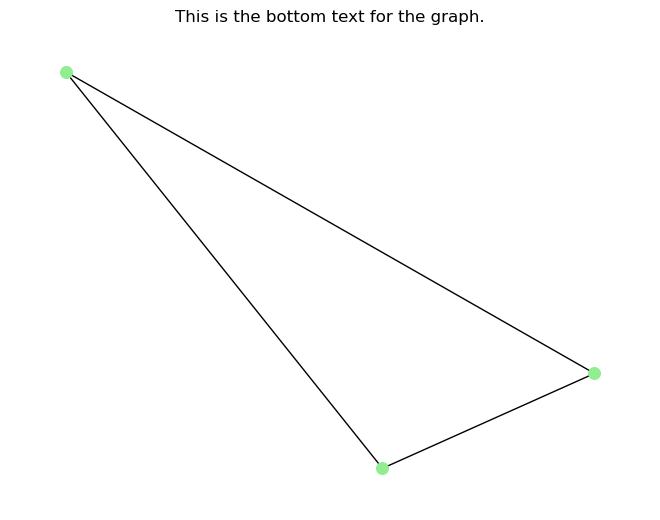

Line 1
Line 2


In [21]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'A')
# Add positions to each node for plotting
for node in G.nodes():
    G.nodes[node]['pos'] = (random.random(), random.random())

# Plot the graph with bottom text
graphify(G, to_plot=True, bottom_text="This is the bottom text for the graph.")
print("Line 1\nLine 2")

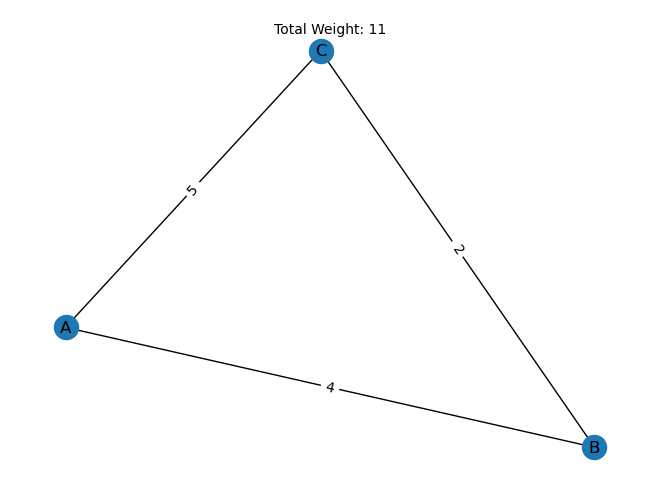

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add nodes and weighted edges
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'C', weight=2)
G.add_edge('C', 'A', weight=5)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Calculate the total weight
total_weight = sum(weight for _, _, weight in G.edges(data='weight'))

# Add text to the plot with the total weight
plt.text(0.5, 0.95, f'Total Weight: {total_weight}', 
         horizontalalignment='center',
         transform=plt.gca().transAxes)

# Show the graph with the text
plt.show()


In [ ]:
def def_dcran(cordmap):
    tree = KDTree(list(cordmap.keys()))
    G = nx.Graph(cordmap)
    k, ccount = 2, len(cordmap) 
    
    while ccount > 1:
        dis2 = min(len(cordmap), math.factorial(k))
        disset = {k, dis2}

        for kdis in sorted(disset):
            for pointi, i in cordmap.items():
                pointj = tree.kthneighbour(pointi, k=kdis)
                G.add_edge(i, cordmap[pointj], 
                            weight=distance(pointi, pointj))

        ccount = count_clusters(G)
        k += 1
        
    return G, tree